# Метод главных компонент (PCA) и k-ближайших соседей (kNN)

### Выполнила: Иванова Елизавета Дмитриевна, НПМбд-01-19

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Импортируем вспомогательные библиотеки:

In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## I. Датасет

1.  Скачиваем базу  данных  digits  при  помощи  функции load_digits из  пакета sklearn.datasets. Получаем массивы картинок в виде массива X, а также ответов labels:

In [3]:
digits = load_digits()
X = digits['data']
label = digits['target']

2.  При  помощи  функции  matplotlib.pyplot.imshow  рисуем  несколько  примеров картинок из X. Чтобы картинки шли в виде массива, а не друг под другом, используем функцию subplots:

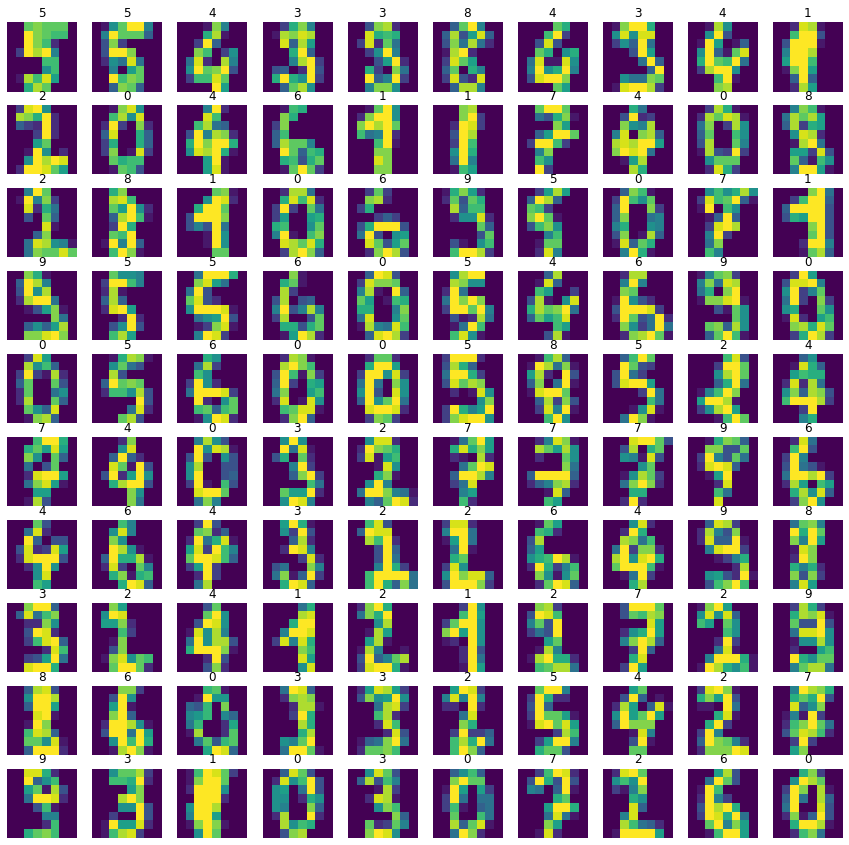

In [4]:
fig, ax = plt.subplots(10, 10, figsize=(15, 15))

for i in range(10):
    for j in range(10):
        k = np.random.randint(0, 1797)
        ax[i, j].imshow(X[k,:].reshape(8,8))
        ax[i, j].set_title(label[k])
        ax[i, j].axis('off')

## II. Алгоритм PCA

Метод главных компонент состоит из следующих 4-х шагов:  
1. Центрирование данных: $ X_c = X – \overline{X} $, где $ \overline{X} $ – среднее для каждого параметра 
2. Вычисление матрицы ковариации: $ C = X_c^TX_C $ 
3. Вычисление собственных векторов $ F $ и значений $ \lambda $ матрицы ковариации $ C $ 
4. Преобразование данных в координаты в базисе главных компонент: $ Y = X_cF $ 

In [5]:
class my_PCA(): 
    
    def __init__(self, n_components=None): 
        
        '''
        сохраняем число компонент n_components 
        
        ''' 
        self.n_components = n_components
    
    def fit(self, X):
        
        '''
        1. Центрирование данных 
        2. Вычисление матрицы ковариации 
        3. Вычисление собственных векторов и значений матрицы ковариации
        
        ''' 
        Xc = X
        Xc -= X.mean(axis=0)
        
        C = Xc.T.dot(Xc)

        l_ambda, F = np.linalg.eigh(C)
        l_ambda = l_ambda[::-1]
        F = F[:, ::-1]
        
        return Xc, F
        
    
    def transform(self, X, F): 
        
        '''
        4. Преобразование данных в координаты в базисе главных компонент
        
        '''
        
        return X.dot(F)
    
    def fit_transform(self, X): 
        
        Xc, F = self.fit(X)
        Y = self.transform(Xc, F)
        
        if self.n_components != None:
            Y = Y[:, :(self.n_components)]
        
        return Y

Изобразим на графике точки датасета в первых двух координатах главных компонент:

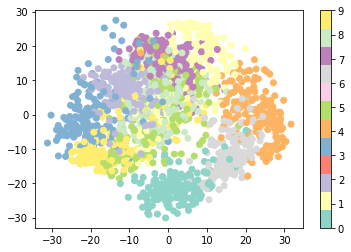

In [6]:
Y = my_PCA(2).fit_transform(X)

plt.scatter(Y[:, 0], Y[:, 1], c=label, cmap='Set3')
plt.colorbar()

## III. Алгоритм kNN

Пусть  $ X_{train} $ – некоторая  обучающая  выборка  данных  с известными  классами  принадлежности  объектов $ y_{train} $.  
Предположим,  есть  некоторый объект $ x_* $  с  неизвестным  классом,  который  мы  хотели  бы  предсказать.  
Посчитаем расстояния от $ x_* $  до каждого из объектов $ X_{train} $ и найдём $ k $ ближайших (т.е. с наименьшим  расстоянием)  из  этого  набора.  
Мы знаем к какому классу принадлежат эти $ k $ соседей $ \implies $ мы  можем предположить, что и наш объект $ x_* $ будет принадлежать к тому классу, из которого наибольшее количество соседей.  

In [7]:
class my_kNN(): 
                    
    def __init__(self, n_neighbors=5):  # 5 соседей по умолчанию
        
        '''
        Сохранем параметр n_neighbors во внутреннюю переменную self.n_neighbors
        
        '''
        self.n_neighbors = n_neighbors
        
    def fit(self, X_train, y_train):
        
        '''
        Сохранем обучающую выборку данных X_train С известными  классами  принадлежности  объектов y_train во внутренние 
        переменные self.X_train и self.y_train соответственно
        
        '''
        self.X_train, self.y_train = X_train, y_train
    
    def predict(self, X):
        
        '''
        Предсказываем возможный класс, к которому принадлежит объект х_звёздочка
        
        '''
        class_of_x_zvezdochka = list()
        
        for x_zvezdochka in X:
            
            # набор расстояний от неизвестного объекта х_звёздочка до известных обучающих объектов X_train
            distances = list()
            
            # поиск расстояния от неизвестного объекта х_звёздочка до каждого элемента X_train
            for i in self.X_train:
                
                distance = np.linalg.norm(np.array(x_zvezdochka) - np.array(i))
                distances.append(distance)
                
            # индексы первых k минимальных расстояний
            min_distances = np.argsort(distances)[:self.n_neighbors]
            
            # набор возможных классов
            possible_class = list()
            
            # индексы для соседей
            for i in min_distances:
                
                possible_class.append(self.y_train[i])
                
            # класс, из которого наибольшее количество соседей
            c = 0
            classs = None
            
            for i in possible_class:
                
                count = possible_class.count(i)
                
                if count > c:
                    
                    c = count
                    classs = i
            
            class_of_x_zvezdochka.append(classs)
            
            
        return class_of_x_zvezdochka

1. Разбиваем данные X и label на обучающую и тестовую выборку, используя функцию train_test_split из модуля sklearn.model_selection. 
2. Создаём классификатор my_kNN с числом соседей равным 5. Обучаем классификатор на обучающих данных. 
3. Считаем точность на тестовой выборке, используя функцию accuracy_scoreиз модуля sklearn.metrics. Точность оказалась значительно больше 10%, значит алгоритм не работет как случайный, всё супер!

In [8]:
# без компонент

X_train, X_test, y_train, y_test = train_test_split(X, label, test_size=0.25, random_state=42)

for i in range (1, 30):
    
    a = my_kNN(i)
    
    a.fit(X_train, y_train)
    class_of_x_zvezdochka = a.predict(X_test)
    
    print(f'Точность при k = {i}:', accuracy_score(y_test, class_of_x_zvezdochka) * 100)

Точность при k = 1: 98.22222222222223
Точность при k = 2: 98.22222222222223
Точность при k = 3: 98.66666666666667
Точность при k = 4: 98.66666666666667
Точность при k = 5: 99.11111111111111
Точность при k = 6: 99.33333333333333
Точность при k = 7: 99.33333333333333
Точность при k = 8: 98.88888888888889
Точность при k = 9: 98.44444444444444
Точность при k = 10: 98.22222222222223
Точность при k = 11: 98.0
Точность при k = 12: 98.0
Точность при k = 13: 98.0
Точность при k = 14: 98.22222222222223
Точность при k = 15: 98.0
Точность при k = 16: 98.22222222222223
Точность при k = 17: 98.22222222222223
Точность при k = 18: 98.0
Точность при k = 19: 97.77777777777777
Точность при k = 20: 97.77777777777777
Точность при k = 21: 97.77777777777777
Точность при k = 22: 98.0
Точность при k = 23: 97.77777777777777
Точность при k = 24: 97.55555555555556
Точность при k = 25: 97.33333333333334
Точность при k = 26: 97.33333333333334
Точность при k = 27: 97.11111111111111
Точность при k = 28: 97.1111111111

4. Уменьшаем размерность данных с помощью метода главных компонент. 
5. Применяем  алгоритм  kNN  к  преобразованным  данным. 
6. Пробуем  разное  количество  соседей  (от  1  до  30)  и  разное  количество  компонент (начиная с одной и заканчивая всеми 64). 

Наилучшая точность получается при количестве соседей k = 6, 7.

In [9]:
# 1 компонента

Y = my_PCA(1).fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(Y, label, test_size=0.25, random_state=42)

for i in range (1, 30):
    
    a = my_kNN(i)
    
    a.fit(X_train, y_train)
    class_of_x_zvezdochka = a.predict(X_test)
    
    print(f'Точность при k = {i}:', accuracy_score(y_test, class_of_x_zvezdochka) * 100)

Точность при k = 1: 29.555555555555557
Точность при k = 2: 29.555555555555557
Точность при k = 3: 28.888888888888886
Точность при k = 4: 30.444444444444446
Точность при k = 5: 31.333333333333336
Точность при k = 6: 33.33333333333333
Точность при k = 7: 32.44444444444444
Точность при k = 8: 32.22222222222222
Точность при k = 9: 32.0
Точность при k = 10: 34.44444444444444
Точность при k = 11: 35.333333333333336
Точность при k = 12: 36.0
Точность при k = 13: 36.22222222222222
Точность при k = 14: 35.77777777777777
Точность при k = 15: 37.111111111111114
Точность при k = 16: 38.22222222222222
Точность при k = 17: 38.666666666666664
Точность при k = 18: 37.77777777777778
Точность при k = 19: 38.666666666666664
Точность при k = 20: 37.77777777777778
Точность при k = 21: 37.77777777777778
Точность при k = 22: 38.22222222222222
Точность при k = 23: 37.111111111111114
Точность при k = 24: 36.888888888888886
Точность при k = 25: 36.666666666666664
Точность при k = 26: 36.888888888888886
Точность

In [10]:
# 5 компонент

Y = my_PCA(5).fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(Y, label, test_size=0.25, random_state=42)

for i in range (1, 30):
    
    a = my_kNN(i)
    
    a.fit(X_train, y_train)
    class_of_x_zvezdochka = a.predict(X_test)
    
    print(f'Точность при k = {i}:', accuracy_score(y_test, class_of_x_zvezdochka) * 100)

Точность при k = 1: 92.66666666666666
Точность при k = 2: 92.66666666666666
Точность при k = 3: 94.22222222222221
Точность при k = 4: 94.44444444444444
Точность при k = 5: 94.0
Точность при k = 6: 94.22222222222221
Точность при k = 7: 94.22222222222221
Точность при k = 8: 94.0
Точность при k = 9: 93.33333333333333
Точность при k = 10: 93.77777777777779
Точность при k = 11: 93.55555555555556
Точность при k = 12: 93.77777777777779
Точность при k = 13: 93.33333333333333
Точность при k = 14: 94.22222222222221
Точность при k = 15: 93.33333333333333
Точность при k = 16: 92.88888888888889
Точность при k = 17: 92.66666666666666
Точность при k = 18: 93.11111111111111
Точность при k = 19: 92.66666666666666
Точность при k = 20: 93.33333333333333
Точность при k = 21: 92.88888888888889
Точность при k = 22: 92.44444444444444
Точность при k = 23: 92.88888888888889
Точность при k = 24: 92.66666666666666
Точность при k = 25: 92.44444444444444
Точность при k = 26: 92.66666666666666
Точность при k = 27: 

In [11]:
# 25 компонента

Y = my_PCA(25).fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(Y, label, test_size=0.25, random_state=42)

for i in range (1, 30):
    
    a = my_kNN(i)
    
    a.fit(X_train, y_train)
    class_of_x_zvezdochka = a.predict(X_test)
    
    print(f'Точность при k = {i}:', accuracy_score(y_test, class_of_x_zvezdochka) * 100)

Точность при k = 1: 98.66666666666667
Точность при k = 2: 98.66666666666667
Точность при k = 3: 98.44444444444444
Точность при k = 4: 98.66666666666667
Точность при k = 5: 98.88888888888889
Точность при k = 6: 98.88888888888889
Точность при k = 7: 99.11111111111111
Точность при k = 8: 99.11111111111111
Точность при k = 9: 98.88888888888889
Точность при k = 10: 99.11111111111111
Точность при k = 11: 98.88888888888889
Точность при k = 12: 99.11111111111111
Точность при k = 13: 98.66666666666667
Точность при k = 14: 98.66666666666667
Точность при k = 15: 98.44444444444444
Точность при k = 16: 98.44444444444444
Точность при k = 17: 98.0
Точность при k = 18: 97.77777777777777
Точность при k = 19: 97.55555555555556
Точность при k = 20: 97.77777777777777
Точность при k = 21: 97.77777777777777
Точность при k = 22: 97.77777777777777
Точность при k = 23: 97.77777777777777
Точность при k = 24: 97.77777777777777
Точность при k = 25: 97.33333333333334
Точность при k = 26: 97.11111111111111
Точность

In [12]:
# 44 компоненты

Y = my_PCA(44).fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(Y, label, test_size=0.25, random_state=42)

for i in range (1, 30):
    
    a = my_kNN(i)
    
    a.fit(X_train, y_train)
    class_of_x_zvezdochka = a.predict(X_test)
    
    print(f'Точность при k = {i}:', accuracy_score(y_test, class_of_x_zvezdochka) * 100)

Точность при k = 1: 98.44444444444444
Точность при k = 2: 98.44444444444444
Точность при k = 3: 98.88888888888889
Точность при k = 4: 98.88888888888889
Точность при k = 5: 99.11111111111111
Точность при k = 6: 99.55555555555556
Точность при k = 7: 99.33333333333333
Точность при k = 8: 98.88888888888889
Точность при k = 9: 98.44444444444444
Точность при k = 10: 98.0
Точность при k = 11: 98.22222222222223
Точность при k = 12: 98.22222222222223
Точность при k = 13: 98.0
Точность при k = 14: 98.0
Точность при k = 15: 98.0
Точность при k = 16: 98.22222222222223
Точность при k = 17: 98.22222222222223
Точность при k = 18: 98.0
Точность при k = 19: 97.77777777777777
Точность при k = 20: 97.77777777777777
Точность при k = 21: 97.77777777777777
Точность при k = 22: 98.0
Точность при k = 23: 97.77777777777777
Точность при k = 24: 97.77777777777777
Точность при k = 25: 97.33333333333334
Точность при k = 26: 97.33333333333334
Точность при k = 27: 97.11111111111111
Точность при k = 28: 97.1111111111

In [13]:
# 64 компоненты

Y = my_PCA(64).fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(Y, label, test_size=0.25, random_state=42)

for i in range (1, 30):
    
    a = my_kNN(i)
    
    a.fit(X_train, y_train)
    class_of_x_zvezdochka = a.predict(X_test)
    
    print(f'Точность при k = {i}:', accuracy_score(y_test, class_of_x_zvezdochka) * 100)

Точность при k = 1: 98.22222222222223
Точность при k = 2: 98.22222222222223
Точность при k = 3: 98.66666666666667
Точность при k = 4: 98.66666666666667
Точность при k = 5: 99.11111111111111
Точность при k = 6: 99.33333333333333
Точность при k = 7: 99.33333333333333
Точность при k = 8: 98.88888888888889
Точность при k = 9: 98.44444444444444
Точность при k = 10: 98.22222222222223
Точность при k = 11: 98.0
Точность при k = 12: 98.0
Точность при k = 13: 98.0
Точность при k = 14: 98.22222222222223
Точность при k = 15: 98.22222222222223
Точность при k = 16: 98.22222222222223
Точность при k = 17: 98.22222222222223
Точность при k = 18: 98.0
Точность при k = 19: 97.77777777777777
Точность при k = 20: 97.77777777777777
Точность при k = 21: 97.77777777777777
Точность при k = 22: 98.0
Точность при k = 23: 97.77777777777777
Точность при k = 24: 97.55555555555556
Точность при k = 25: 97.33333333333334
Точность при k = 26: 97.33333333333334
Точность при k = 27: 97.11111111111111
Точность при k = 28: 